# Measuring Correlations between SM and Polling Results

Imports

In [1]:
# imports
import os
import pandas as pd
import seaborn as sns
import openpyxl
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

We grab the pollong results by hand to keep things explainable

In [2]:
# The days prior to a date for which we´ll sum the number of reactions
days = [1,2,3,4,5,6,7,14,21,28]

# Dates of published polls to read (as reported by Oraculus.mx)
date_strings = [
    "2023-09-15", "2023-09-16", "2023-10-15", "2023-10-16", "2023-10-17", "2023-10-18", "2023-10-19", "2023-10-20", "2023-10-21", "2023-11-15", "2023-11-16", "2023-11-17", "2023-11-18", "2023-11-19", "2023-11-20", "2023-11-21", "2023-11-22", "2023-11-23", "2023-12-15", "2023-12-16", "2023-12-17", "2023-12-18", "2023-12-19", "2023-12-20", "2023-12-21", "2023-12-22", "2023-12-23", "2023-12-24", "2024-01-15", "2024-01-16", "2024-01-17", "2024-01-18", "2024-01-19", "2024-01-20", "2024-01-21", "2024-02-15", "2024-02-16", "2024-02-17", "2024-02-18", "2024-02-19", "2024-02-20", "2024-03-15", "2024-03-16", "2024-03-17", "2024-03-18", "2024-03-19", "2024-03-20", "2024-03-21", "2024-03-22", "2024-03-23", "2024-03-24", "2024-04-15",  "2024-04-16",  "2024-04-17",  "2024-04-18",  "2024-04-19",  "2024-04-20",  "2024-04-21",  "2024-04-22",  "2024-04-23",  "2024-04-24", "2024-05-15", "2024-05-16", "2024-05-17", "2024-06-2"]

    # Polls correspoding to a date
polls = ["Enkoll", "GEA-ISA", "Covarrubias", "El FInanciero", "Enkoll", "Mendoza Blanco", "Mitofsky", "Parametría", "Simo", "Buendía y Márquez", "Covarrubias", "Demotecnia", "El Financiero", "Enkoll", "Mendoza Blanco", "Mitofsky", "Parametría", "Reforma", "Berumen", "Covarrubias", "Demotecnia", "El Financiero", "GEA-ISA", "Mendoza Blanco", "Mitofsky", "Parametría", "Simo", "Citibanamex", "Berumen", "Demotecnia", "El Financiero", "Enkoll", "Mendoza Blanco", "Mitofsky", "Simo", "Berumen", "Buendía y Márquez", "Demotecnia", "El Financiero", "Mitofsky", "Simo", "Altica", "Berumen", "Covarrubias", "Demotecnia", "El Financiero", "GEA-ISA", "Mendoza Blanco", "Mitofsky", "Reforma", "Citibanamex", "Altica", "Berumen", "Covarrubias", "El Financiero", "Enkoll", "GEA-ISA", "Mendoza Blanco", "Mitofsky", "Parametría", "Citibanamex", "Altica", "Berumen", "Mitofsky", "Final"]

# Target variables for each polling release (reported share of preference)
targets_claudia = [49, 53, 59, 46, 50, 55, 48, 60, 57, 48, 57, 66, 50, 49, 54, 50, 52, 46, 51, 55, 65, 52, 52, 54, 50, 53, 57, 46, 54, 66, 48, 55, 61, 51, 63, 54, 47, 67, 50, 52, 60, 50, 55, 54, 63, 51, 52, 54, 50, 48, 52, 51, 50, 52, 49, 55, 49, 51, 51, 44, 47, 50, 50, 49, 59]

targets_galvez = [26, 34, 21, 28, 27, 24, 27, 17, 22, 24, 22, 14, 31, 23, 24, 27, 25, 25, 27, 22, 13, 30, 30, 23, 25, 26, 23, 24, 27, 14, 32, 27, 24, 27, 22, 27, 28, 15, 33, 28, 25, 38, 29, 27, 15, 34, 33, 29, 29, 28, 29, 39, 29, 27, 32, 31, 34, 25, 27, 31, 29, 40, 29, 28, 27] 



# Dates of published polls to read (as reported by Oraculus.mx)
date_strings_maynez = ["2024-01-21", "2024-02-15", "2024-02-16", "2024-02-17", "2024-02-18", "2024-02-19", "2024-02-20", "2024-03-15", "2024-03-16", "2024-03-17", "2024-03-18", "2024-03-19", "2024-03-20", "2024-03-21", "2024-03-22", "2024-03-23", "2024-03-24", "2024-04-15",  "2024-04-16",  "2024-04-17",  "2024-04-18",  "2024-04-19",  "2024-04-20",  "2024-04-21",  "2024-04-22",  "2024-04-23",  "2024-04-24", "2024-05-15", "2024-05-16", "2024-05-17", "2024-06-02"]

# Polls correspoding to a date
polls_maynez = ["Simo", "Berumen", "Buendía y Márquez", "Demotecnia", "El Financiero", "Mitofsky", "Simo", "Altica", "Berumen", "Covarrubias", "Demotecnia", "El Financiero", "GEA-ISA", "Mendoza Blanco", "Mitofsky", "Reforma", "Citibanamex", "Altica", "Berumen", "Covarrubias", "El Financiero", "Enkoll", "GEA-ISA", "Mendoza Blanco", "Mitofsky", "Parametría", "Citibanamex", "Altica", "Breumen", "Mitofsky", "Final"]


targets_maynez = [4, 5, 4, 2, 8, 5, 3, 6, 4, 5, 2, 7, 4, 6, 5, 7, 5, 5, 4, 7, 8, 6, 6, 11, 9, 8, 7, 7, 9, 10, 10]

## 1. Creating a polling dataframe CS and XG

In [3]:
polls_dict = {"Date": date_strings, "Claudia": targets_claudia, "Gálvez": targets_galvez, "Poll": polls}
polls_df = pd.DataFrame(polls_dict)
polls_df['month'] = pd.DatetimeIndex(polls_df['Date']).month
polls_df

,Date,Claudia,Gálvez,Poll,month
0,2023-09-15,49,26,Enkoll,9
1,2023-09-16,53,34,GEA-ISA,9
2,2023-10-15,59,21,Covarrubias,10
3,2023-10-16,46,28,El FInanciero,10
4,2023-10-17,50,27,Enkoll,10
...,...,...,...,...,...
60,2024-04-24,47,29,Citibanamex,4
61,2024-05-15,50,40,Altica,5
62,2024-05-16,50,29,Berumen,5
63,2024-05-17,49,28,Mitofsky,5


In [4]:
polls_df.columns, len(polls_df)

(Index(['Date', 'Claudia', 'Gálvez', 'Poll', 'month'], dtype='object'), 65)

Creating the average polling result by month

In [5]:
# Step 1: Filter the DataFrame based on a condition
average_sep_cs = polls_df[polls_df['month'] == 9]['Claudia'].mean().round(2)
average_oct_cs = polls_df[polls_df['month'] == 10]['Claudia'].mean().round(2)
average_nov_cs = polls_df[polls_df['month'] == 11]['Claudia'].mean().round(2)
average_dec_cs = polls_df[polls_df['month'] == 12]['Claudia'].mean().round(2)
average_jan_cs = polls_df[polls_df['month'] == 1]['Claudia'].mean().round(2)
average_feb_cs = polls_df[polls_df['month'] == 2]['Claudia'].mean().round(2)
average_mar_cs = polls_df[polls_df['month'] == 3]['Claudia'].mean().round(2)
average_apr_cs = polls_df[polls_df['month'] == 4]['Claudia'].mean().round(2)
average_may_cs = polls_df[polls_df['month'] == 5]['Claudia'].mean().round(2)

# Step 1: Filter the DataFrame based on a condition
average_sep_xg = polls_df[polls_df['month'] == 9]['Gálvez'].mean().round(2)
average_oct_xg = polls_df[polls_df['month'] == 10]['Gálvez'].mean().round(2)
average_nov_xg = polls_df[polls_df['month'] == 11]['Gálvez'].mean().round(2)
average_dec_xg = polls_df[polls_df['month'] == 12]['Gálvez'].mean().round(2)
average_jan_xg = polls_df[polls_df['month'] == 1]['Gálvez'].mean().round(2)
average_feb_xg = polls_df[polls_df['month'] == 2]['Gálvez'].mean().round(2)
average_mar_xg = polls_df[polls_df['month'] == 3]['Gálvez'].mean().round(2)
average_apr_xg = polls_df[polls_df['month'] == 4]['Gálvez'].mean().round(2)
average_may_xg = polls_df[polls_df['month'] == 5]['Gálvez'].mean().round(2)

percentage_dict = {
  "Month": ["Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May"], 
  "Claudia": [average_sep_cs, average_oct_cs, average_nov_cs, average_dec_cs, average_jan_cs, average_feb_cs, average_mar_cs, average_apr_cs, average_may_cs],
  "Galvez": [average_sep_xg, average_oct_xg, average_nov_xg, average_dec_xg, average_jan_xg, average_feb_xg, average_mar_xg, average_apr_xg, average_may_xg],
}

percentage_df = pd.DataFrame(percentage_dict)
percentage_df

,Month,Claudia,Galvez
0,Sep,51.00,30.00
1,Oct,53.57,23.71
2,Nov,52.44,23.89
3,Dec,53.50,24.30
4,Jan,56.86,24.71
5,Feb,55.00,26.00
6,Mar,52.90,29.10
7,Apr,49.90,30.40
8,May,49.67,32.33


In [6]:
# Does every day have a poll? Does every poll have a percentage?
len(date_strings), len(targets_claudia), len(targets_galvez), len(polls), len(targets_maynez)

(65, 65, 65, 65, 31)

## 1. Creating a polling dataframe AV

In [7]:
polls_dict_maynez = {"Date": date_strings_maynez, "Maynez": targets_maynez, "Poll": polls_maynez}
polls_df_maynez = pd.DataFrame(polls_dict_maynez)
polls_df_maynez['month'] = pd.DatetimeIndex(polls_df_maynez['Date']).month
polls_df_maynez

,Date,Maynez,Poll,month
0,2024-01-21,4,Simo,1
1,2024-02-15,5,Berumen,2
2,2024-02-16,4,Buendía y Márquez,2
3,2024-02-17,2,Demotecnia,2
4,2024-02-18,8,El Financiero,2
5,2024-02-19,5,Mitofsky,2
6,2024-02-20,3,Simo,2
7,2024-03-15,6,Altica,3
8,2024-03-16,4,Berumen,3
9,2024-03-17,5,Covarrubias,3


In [8]:
polls_df_maynez.columns, len(polls_df_maynez)

(Index(['Date', 'Maynez', 'Poll', 'month'], dtype='object'), 31)

In [9]:
# Step 1: Filter the DataFrame based on a condition
average_jan_av = polls_df_maynez[polls_df_maynez['month'] == 1]['Maynez'].mean().round(2)
average_feb_av = polls_df_maynez[polls_df_maynez['month'] == 2]['Maynez'].mean().round(2)
average_mar_av = polls_df_maynez[polls_df_maynez['month'] == 3]['Maynez'].mean().round(2)
average_apr_av = polls_df_maynez[polls_df_maynez['month'] == 4]['Maynez'].mean().round(2)
average_may_av = polls_df_maynez[polls_df_maynez['month'] == 5]['Maynez'].mean().round(2)

percentage_dict_maynez = {
  "Month": ["Jan", "Feb", "Mar", "Apr", "May"], 
  "Maynez": [average_jan_av, average_feb_av, average_mar_av, average_apr_av, average_may_av]
}

percentage_df_maynez = pd.DataFrame(percentage_dict_maynez)
percentage_df_maynez

,Month,Maynez
0,Jan,4.00
1,Feb,4.50
2,Mar,5.10
3,Apr,7.10
4,May,8.67


## 2. Obtaining the Dataset

In [10]:
# File Path
file_path = "../New_DB.xlsx"
# Read all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(file_path, skiprows=1, sheet_name=None)

# Access each DataFrame by sheet name
galvez_df = all_sheets["Galvez"]
claudia_df = all_sheets["Claudia"]
maynez_df = all_sheets["Maynez"]

# Convert 'Date' column to datetime if it's not already
galvez_df['Date'] = pd.to_datetime(galvez_df['Date'])
claudia_df['Date'] = pd.to_datetime(claudia_df['Date'])
maynez_df['Date'] = pd.to_datetime(maynez_df['Date'])

How many records do we have?

In [11]:
len(galvez_df)

269

Creating a month column to make grouping easier later

In [24]:
galvez_df['Month'] = pd.DatetimeIndex(galvez_df['Date']).month
claudia_df['Month'] = pd.DatetimeIndex(claudia_df['Date']).month
maynez_df["Month"] = pd.DatetimeIndex(maynez_df["Date"]).month

In [13]:
galvez_df.head()

,Date,XPosts,Xcomments,XRts,Xlikes,XCommsPPost,XRTsPPost,XlikesPPost,FBPosts,FBReactions,...,FBReactsPPost,FBCommsPPost,FBSharesPPost,IGPosts,IGLikes,IGLikesPPost,YTPosts,YTViews,YTViewsPPost,Month
0,2023-09-07,4,8915,12465,42008,2228.750000,3116.25,10502.000000,5,200000,...,40000.000000,9420.000000,1497.200000,4,62478,15619.500000,5,89700,17940.000000,9
1,2023-09-08,4,5067,8036,28698,1266.750000,2009.00,7174.500000,4,23900,...,5975.000000,1842.500000,249.500000,4,47800,11950.000000,2,73000,36500.000000,9
2,2023-09-09,4,5947,16665,47976,1486.750000,4166.25,11994.000000,4,133000,...,33250.000000,12300.000000,2899.250000,3,47197,15732.333333,3,116200,38733.333333,9
3,2023-09-10,7,4836,17374,54063,690.857143,2482.00,7723.285714,9,193400,...,21488.888889,4620.555556,844.111111,5,42862,8572.400000,3,195000,65000.000000,9
4,2023-09-11,4,5198,8040,30296,1299.500000,2010.00,7574.000000,3,50000,...,16666.666667,8866.666667,830.666667,2,23245,11622.500000,3,724000,241333.333333,9


In [14]:
galvez_df.columns

Index(['Date', 'XPosts', 'Xcomments', 'XRts', 'Xlikes', 'XCommsPPost',
       'XRTsPPost', 'XlikesPPost', 'FBPosts', 'FBReactions', 'FBComments',
       'FBShares', 'FBReactsPPost', 'FBCommsPPost', 'FBSharesPPost', 'IGPosts',
       'IGLikes', 'IGLikesPPost', 'YTPosts', 'YTViews', 'YTViewsPPost',
       'Month'],
      dtype='object')

## 3. Visualizing Correlations with Voting Performance

### 3.1 Xóchitl Gálvez

In [15]:
# From excel tables for quick claculation (dynamic tables)
corr_xg_dict = {
    "PostsX": [206, 367, 320, 192, 594, 307, 289, 380, 407],
    "CommsX": [215107, 211539, 242121, 178388, 219241, 235777, 285803, 428116, 366420],
    "RtsX": [387915, 442141, 580682, 489442, 659631, 626886, 1027063, 1216404, 1264587],
    "LikesX": [1224021, 1241562, 1673784, 1359357, 1777067, 1678089, 2459200, 3012905, 3209980],
    "PostsFB": [136, 236, 277, 164, 250, 187, 284, 448, 558],
    "ReactsFB": [2011000, 1487400, 1769384, 3170400, 3154100, 2496700,6706000,10234600,7141625],
    "CommsFB": [641075, 472743, 392701, 813131, 808951, 663981, 1559188, 2565896,1477092],
    "SharesFB": [118393, 114982, 131730, 167072, 194369,179249,420757,594794,530949],
    "PostsIG": [92, 166, 228, 152, 178,137,245,303,363],
    "LikesIG": [1012208, 986915, 1249032, 1257294, 1438017, 1457918,3081440,3697481,4308017],
    "PostsYT": [59, 72, 63, 66, 78, 45, 78,142,179],
    "ViewsYT": [2677567, 1018005, 1125253, 15364565, 12203322,1609928,43795900,9930357,11390872],
}

corr_df_xg = pd.DataFrame(corr_xg_dict)
corr_df_xg["CommsPPostX"] = corr_df_xg['CommsX'] / corr_df_xg['PostsX']
corr_df_xg["RtsPPostX"] = corr_df_xg['RtsX'] / corr_df_xg['PostsX']
corr_df_xg["LikesPPostX"] = corr_df_xg['LikesX'] / corr_df_xg['PostsX']

corr_df_xg['ReactsPPostFB'] = corr_df_xg['ReactsFB'] / corr_df_xg['PostsFB']
corr_df_xg['CommsPPostFB'] = corr_df_xg['CommsFB'] / corr_df_xg['PostsFB']
corr_df_xg['SharesPPostFB'] = corr_df_xg['SharesFB'] / corr_df_xg['PostsFB']

corr_df_xg['LikesPPostIG'] = corr_df_xg['LikesIG'] / corr_df_xg['PostsIG']

corr_df_xg['ViewsPPostYT'] = corr_df_xg['ViewsYT'] / corr_df_xg['PostsYT']

corr_df_xg["Share"] = percentage_df["Galvez"]

len(corr_df_xg.columns)

21

In [16]:
corr_df_xg

,PostsX,CommsX,RtsX,LikesX,PostsFB,ReactsFB,CommsFB,SharesFB,PostsIG,LikesIG,...,ViewsYT,CommsPPostX,RtsPPostX,LikesPPostX,ReactsPPostFB,CommsPPostFB,SharesPPostFB,LikesPPostIG,ViewsPPostYT,Share
0,206,215107,387915,1224021,136,2011000,641075,118393,92,1012208,...,2677567,1044.208738,1883.082524,5941.849515,14786.764706,4713.786765,870.536765,11002.260870,45382.491525,30.00
1,367,211539,442141,1241562,236,1487400,472743,114982,166,986915,...,1018005,576.400545,1204.743869,3383.002725,6302.542373,2003.148305,487.211864,5945.271084,14138.958333,23.71
2,320,242121,580682,1673784,277,1769384,392701,131730,228,1249032,...,1125253,756.628125,1814.631250,5230.575000,6387.667870,1417.693141,475.559567,5478.210526,17861.158730,23.89
3,192,178388,489442,1359357,164,3170400,813131,167072,152,1257294,...,15364565,929.104167,2549.177083,7079.984375,19331.707317,4958.115854,1018.731707,8271.671053,232796.439394,24.30
4,594,219241,659631,1777067,250,3154100,808951,194369,178,1438017,...,12203322,369.092593,1110.489899,2991.695286,12616.400000,3235.804000,777.476000,8078.747191,156452.846154,24.71
5,307,235777,626886,1678089,187,2496700,663981,179249,137,1457918,...,1609928,768.003257,2041.973941,5466.087948,13351.336898,3550.700535,958.550802,10641.737226,35776.177778,26.00
6,289,285803,1027063,2459200,284,6706000,1559188,420757,245,3081440,...,43795900,988.937716,3553.851211,8509.342561,23612.676056,5490.098592,1481.538732,12577.306122,561485.897436,29.10
7,380,428116,1216404,3012905,448,10234600,2565896,594794,303,3697481,...,9930357,1126.621053,3201.063158,7928.697368,22845.089286,5727.446429,1327.665179,12202.907591,69932.091549,30.40
8,407,366420,1264587,3209980,558,7141625,1477092,530949,363,4308017,...,11390872,900.294840,3107.093366,7886.928747,12798.611111,2647.118280,951.521505,11867.815427,63636.156425,32.33


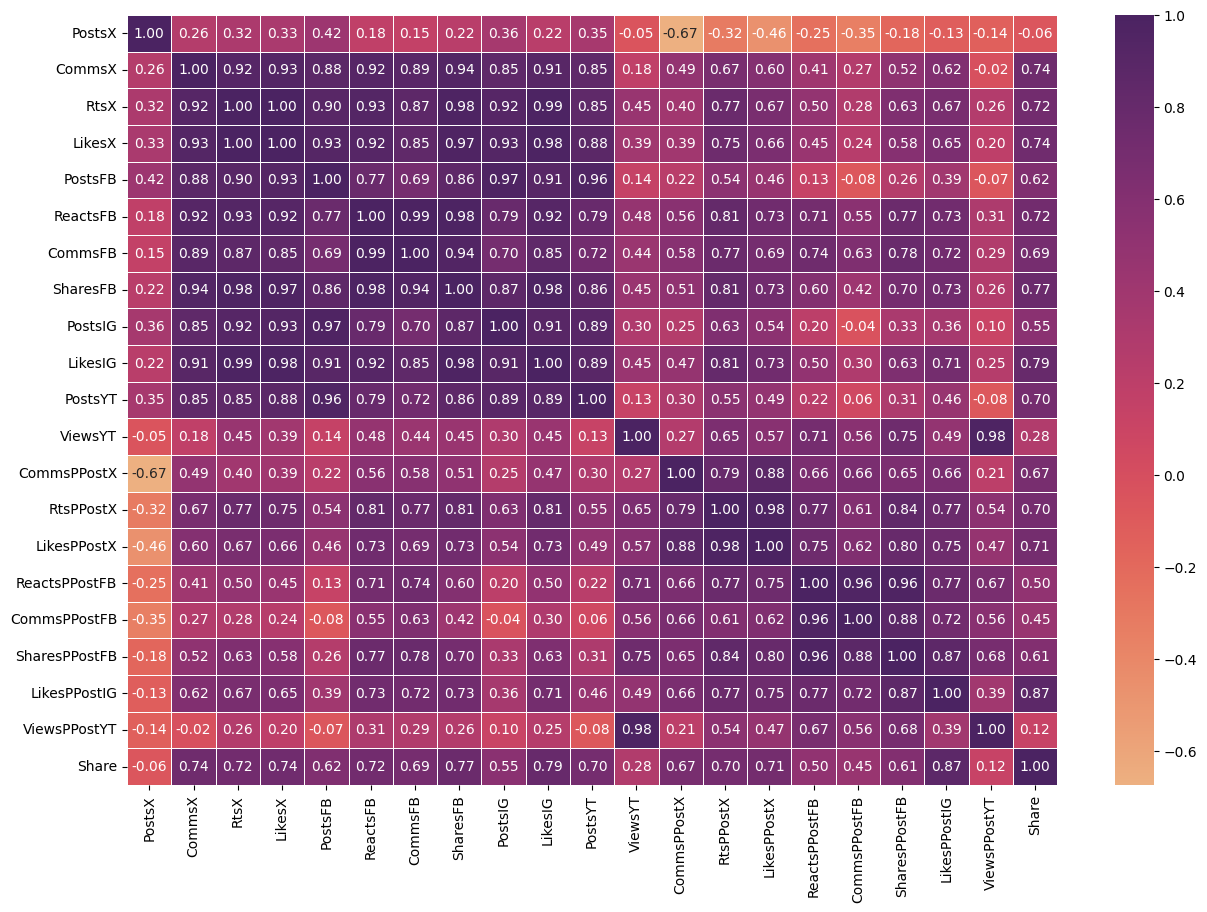

In [17]:
# Let's make it look a little prettier
corr_matrix = corr_df_xg.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="flare");

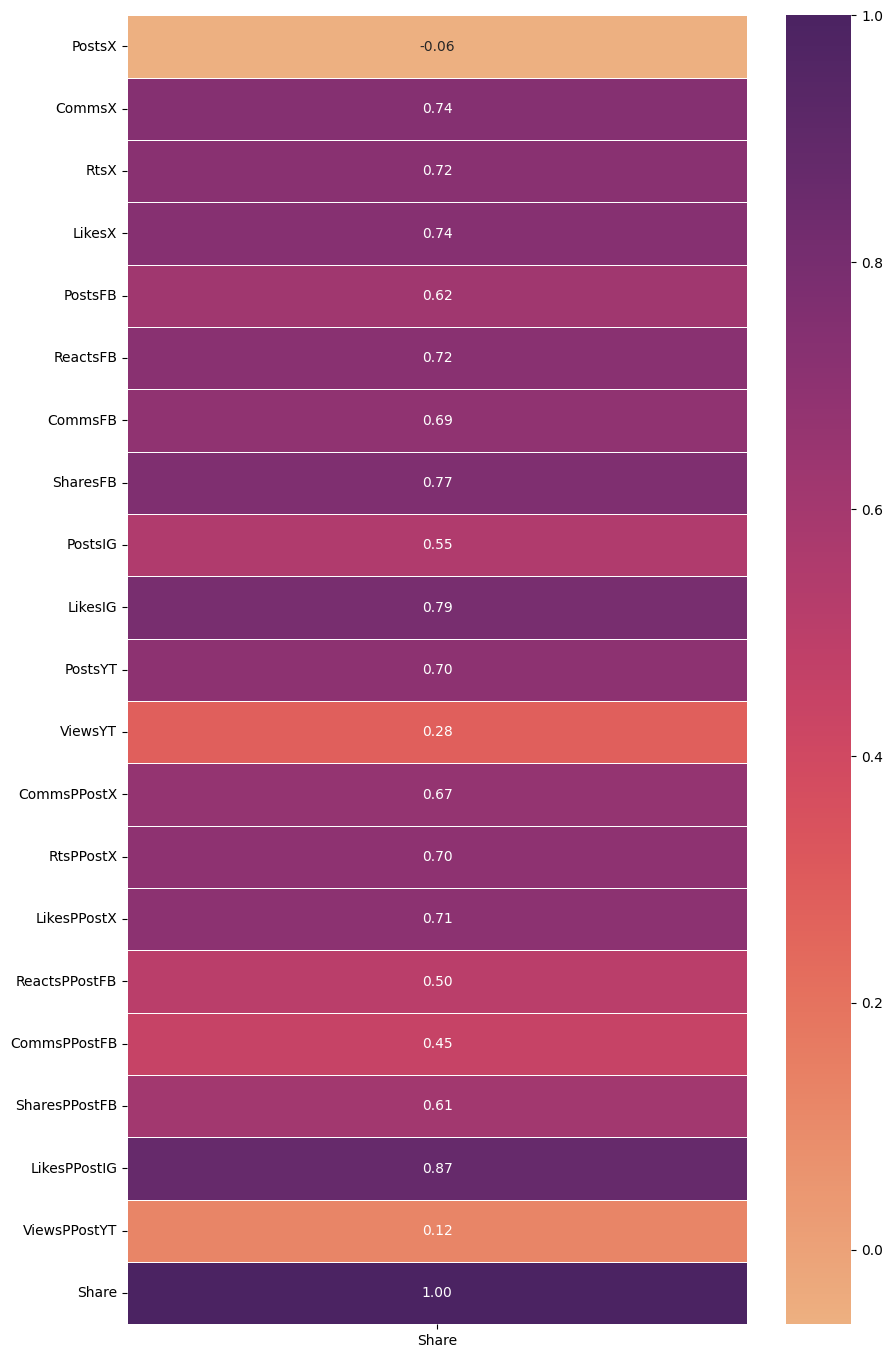

In [18]:
# Let's make it look a little prettier
corr_matrix = corr_df_xg.corr()
x = corr_matrix[['Share']]
plt.figure(figsize=(10, 17))
sns.heatmap(x, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="flare");

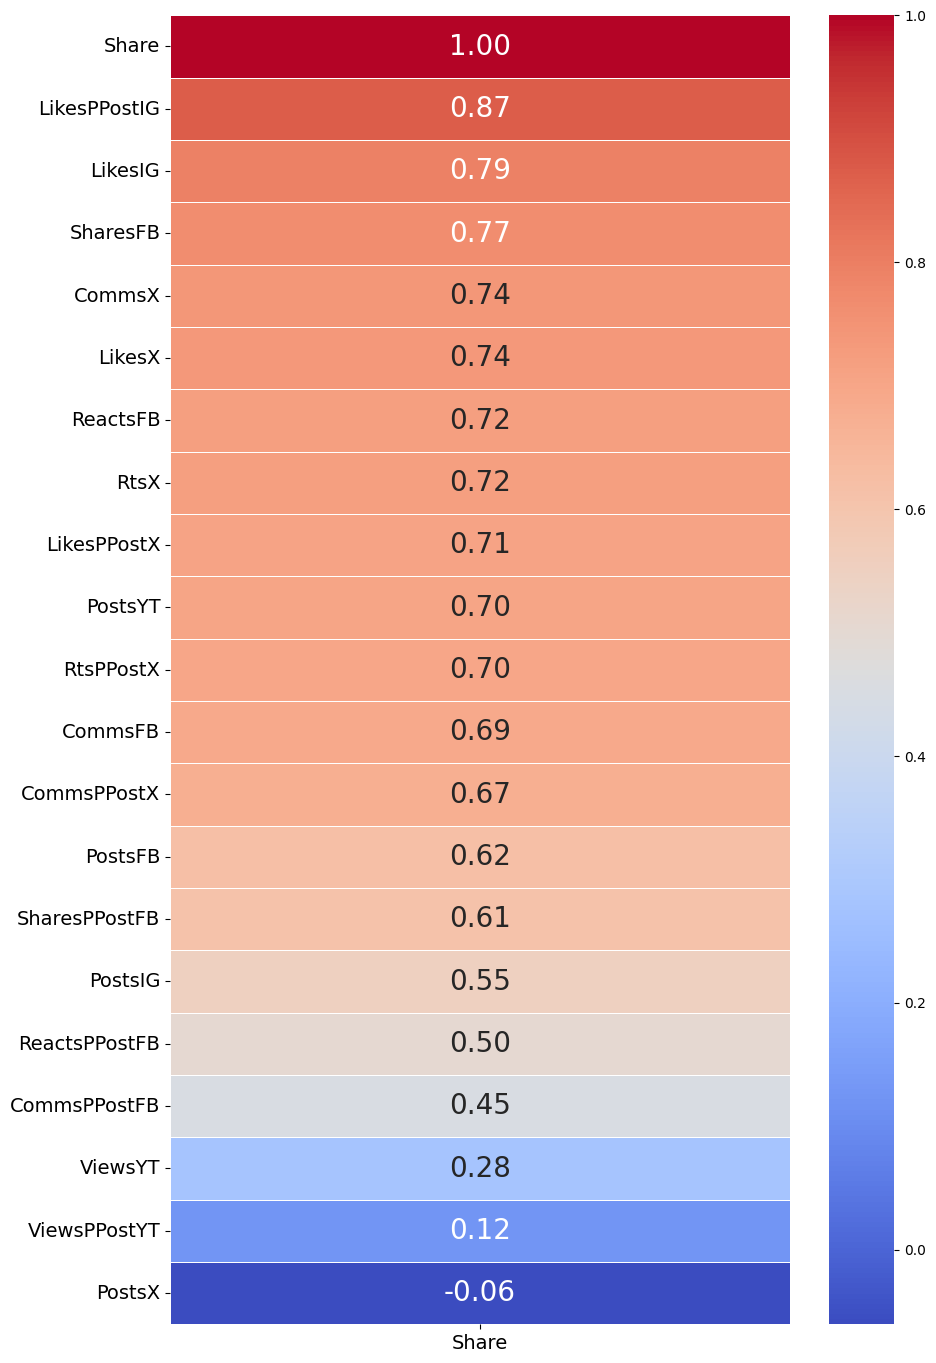

In [19]:
x = x.sort_values(['Share'], ascending=False)
plt.figure(figsize=(10, 17))
sns.heatmap(x, 
            annot=True, 
            annot_kws={"size": 20},
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="coolwarm");

plt.xticks(fontsize=14)  # Set font size for x-axis labels (columns)
plt.yticks(fontsize=14)

plt.show()

### 3.2 Claudia Sheinbaum

In [20]:
# From excel tables for quick claculation (dynamic tables)
corr_cs_dict = {
    # "Month": ["Sep", "Oct", "Nov", "Dec", "Jan"],
    "PostsX": [158, 157, 184, 234, 186, 175,265,317,334],
    "CommsX": [141634, 152321, 148256, 121033, 118159,204573,221090,256878,279085],
    "RtsX": [252559, 217191, 256908, 279808, 223810,292063,459066,543271,544453],
    "LikesX": [802229, 562454, 729858, 763143, 624200,784010,1214089,1500800,1494190],
    "PostsFB": [140, 213, 266, 362, 267, 234,348,389,466],
    "ReactsFB": [1344500, 1215600, 1195463, 1539600, 2210600,1954700,6094800,7958200,7815700],
    "CommsFB": [165311, 198340, 169751, 188131, 20974,185066,462897,564136,560195],
    "SharesFB": [116579, 140631, 139121, 144972, 166544,181259,524172,606972,663801],
    "PostsIG": [108, 154, 182, 249, 230,157,310,280,357],
    "LikesIG": [927182, 1018104, 960514, 917812, 1024826,1191435,2478264,3279280,3858873],
    "PostsYT": [17, 36, 56, 150, 90,52,98,58,38],
    "ViewsYT": [472100, 742420, 1822618, 5059991, 2591115,4812720,6188807,3908000,1479096],
}

corr_df_cs = pd.DataFrame(corr_cs_dict)
corr_df_cs["CommsPPostX"] = corr_df_cs["CommsX"] / corr_df_cs["PostsX"]
corr_df_cs["RtsPPostX"] = corr_df_cs["RtsX"] / corr_df_cs["PostsX"]
corr_df_cs["LikesPPostX"] = corr_df_cs["LikesX"] / corr_df_cs["PostsX"]

corr_df_cs["ReactsPPostFB"] = corr_df_cs["ReactsFB"] / corr_df_cs["PostsFB"]
corr_df_cs["CommsPPostFB"] = corr_df_cs["CommsFB"] / corr_df_cs["PostsFB"]
corr_df_cs["SharesPPostFB"] = corr_df_cs["SharesFB"] / corr_df_cs["PostsFB"]

corr_df_cs["LikesPPostIG"] = corr_df_cs["LikesIG"] / corr_df_cs["PostsIG"]

corr_df_cs["ViewsPPostYT"] = corr_df_cs["ViewsYT"] / corr_df_cs["PostsYT"]

corr_df_cs["Share"] = percentage_df["Claudia"]

len(corr_df_cs.columns)

21

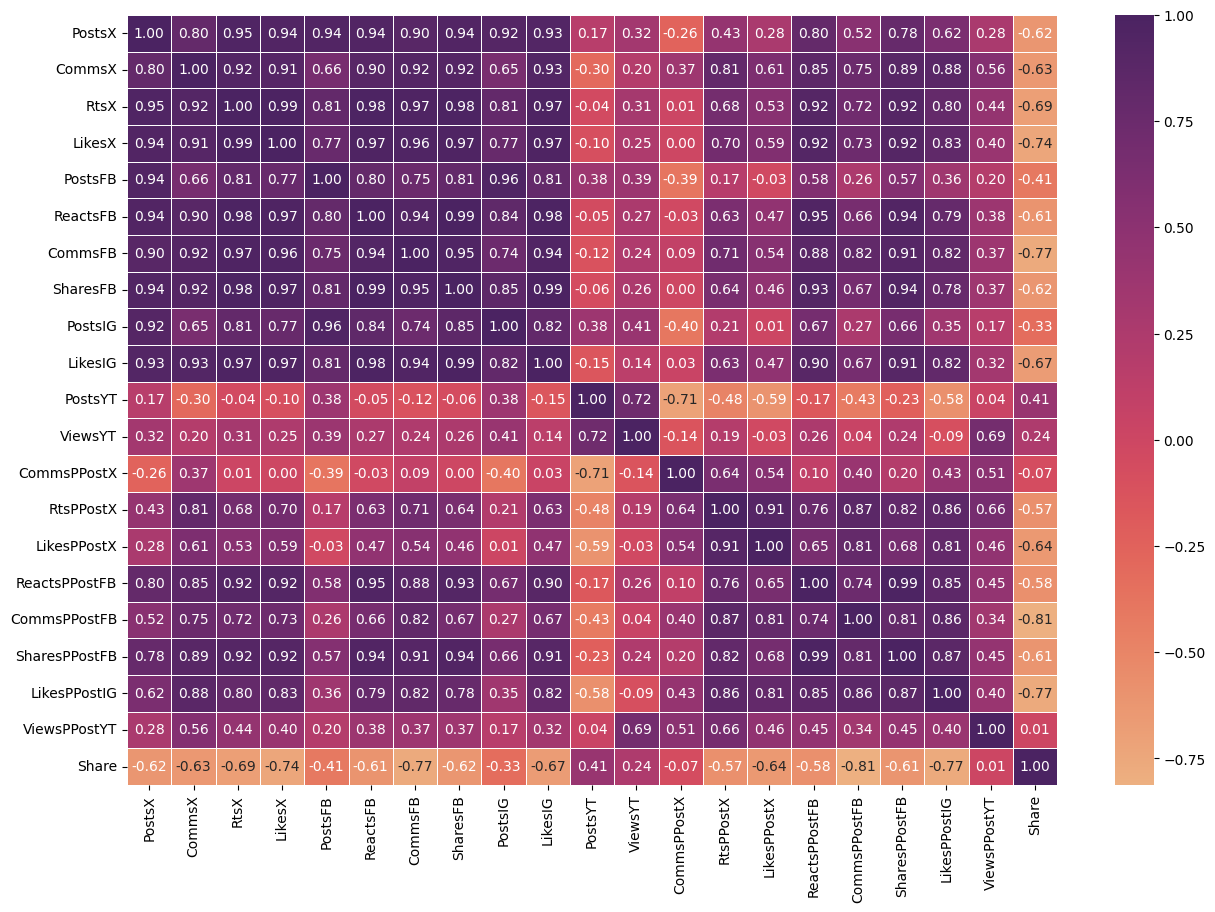

In [21]:
# Let's make it look a little prettier
corr_matrix = corr_df_cs.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="flare");

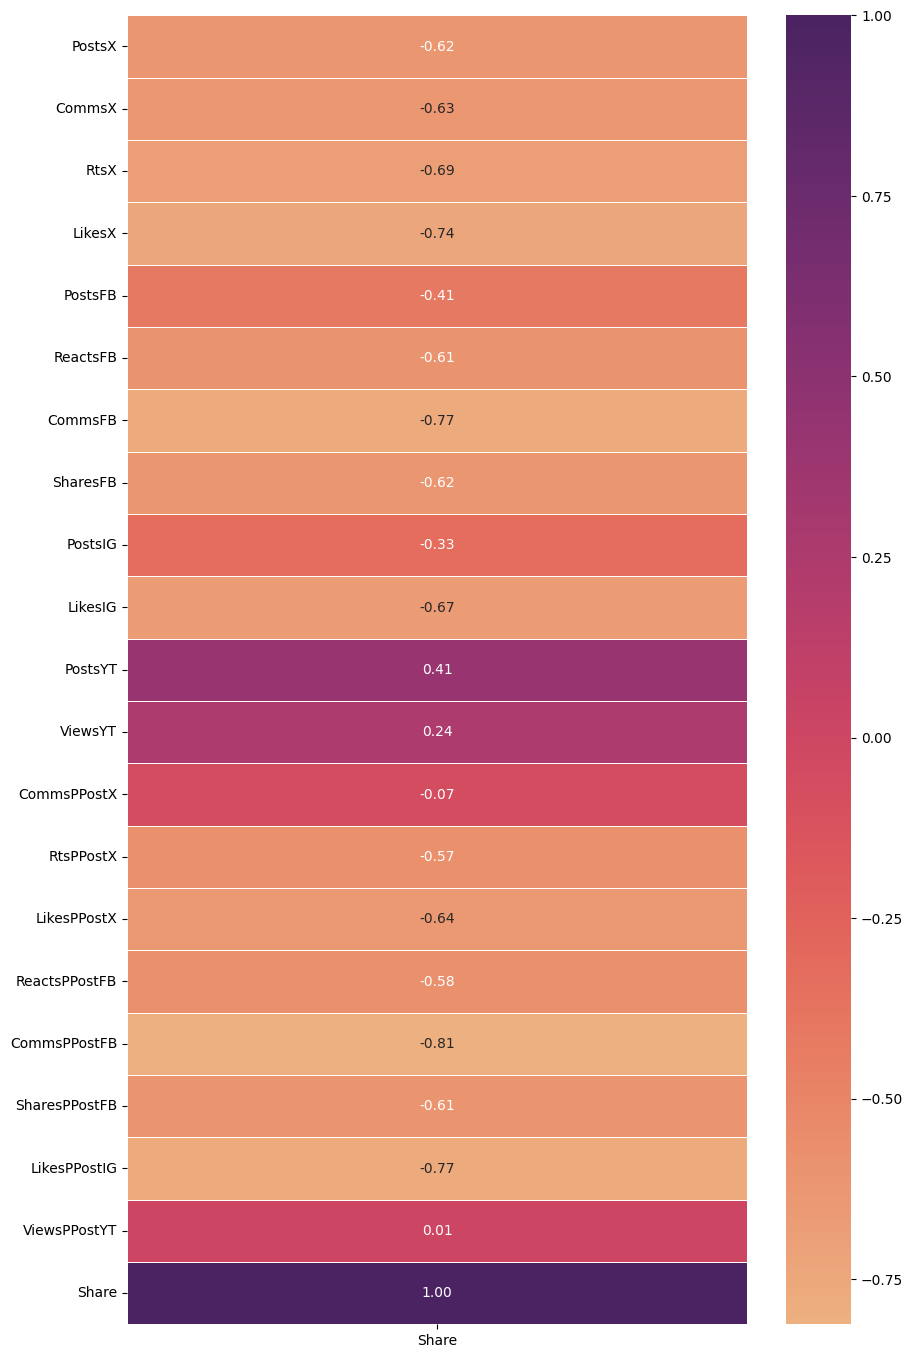

In [22]:
# Let's make it look a little prettier
corr_matrix = corr_df_cs.corr()
x = corr_matrix[['Share']]
plt.figure(figsize=(10, 17))
sns.heatmap(x, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="flare");

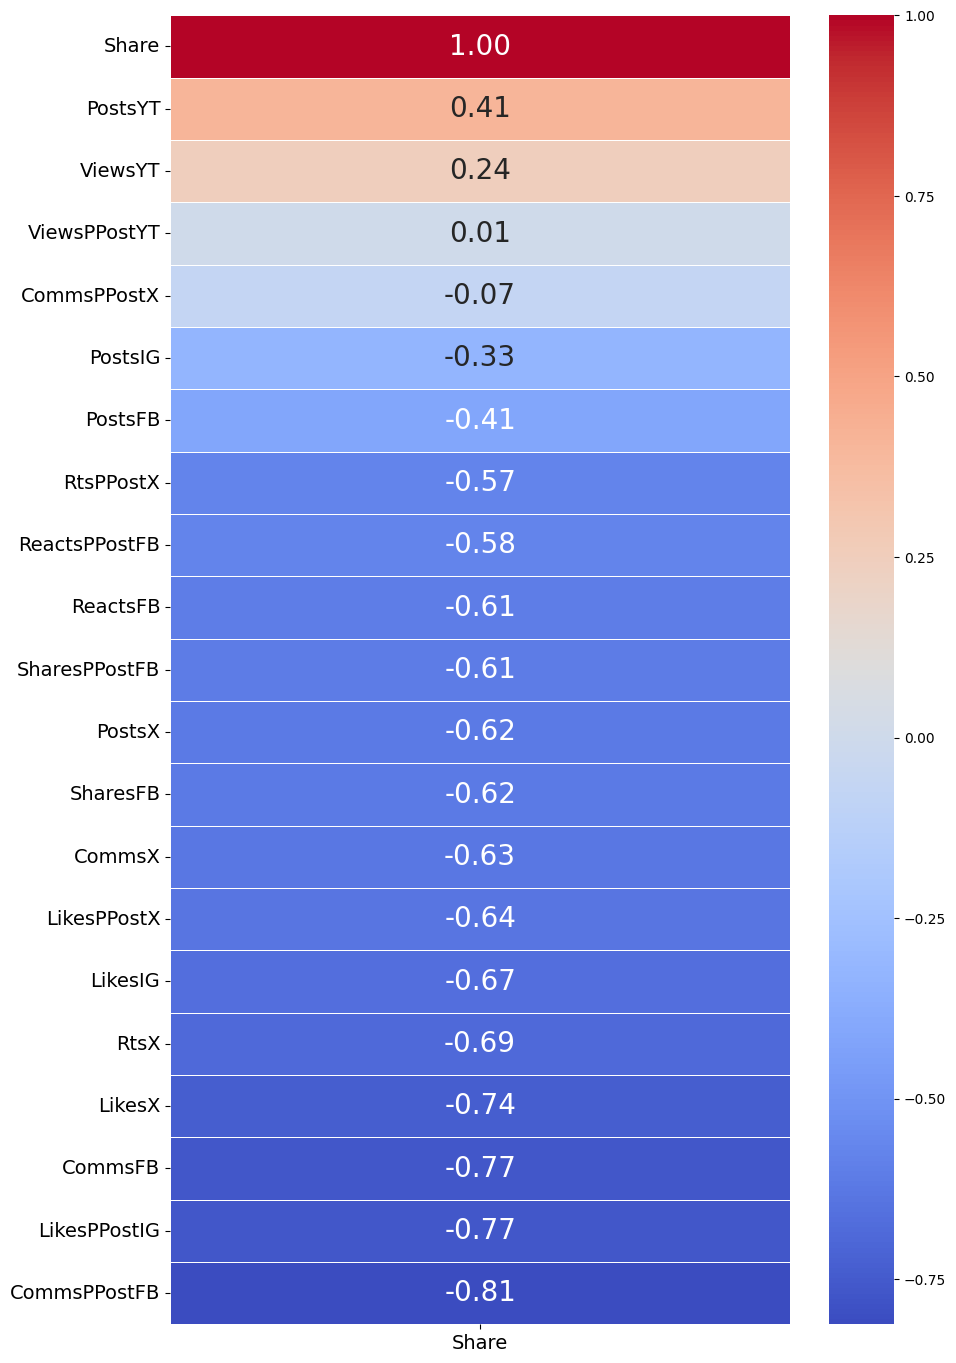

In [23]:
x = x.sort_values(['Share'], ascending=False)
plt.figure(figsize=(10, 17))
sns.heatmap(x, 
            annot=True, 
            annot_kws={"size": 20},
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="coolwarm");

            # Adjust the size of the feature labels (ticks)
plt.xticks(fontsize=14)  # Set font size for x-axis labels (columns)
plt.yticks(fontsize=14)

plt.show()

### 3.3 Alvarez Maynez

In [27]:
# From excel tables for quick claculation (dynamic tables)
corr_am_dict = {
    # "Month": ["Jan", "Feb", "Mar", "Apr", "May"],
    "PostsX": [153,114,205,386,394],
    "CommsX": [18900,21098,17843,59409,225398],
    "RtsX": [5367,4724,10767,61303,85961],
    "LikesX": [15794,12622,26904,607282,579528],
    "PostsFB": [165,223,212,337,360],
    "ReactsFB": [44805,54294,421047,1665337,1427616],
    "CommsFB": [10361,10768,64823,130518,134314],
    "SharesFB": [5153,6361,27005,122664,104688],
    "PostsIG": [92,123,177,346,383],
    "LikesIG": [190614,94275,420737,5136737,6541842],
    "PostsYT": [19,4,94,60,71],
    "ViewsYT": [483860,13003385,98095000,47818798,38450689],
}


corr_df_am = pd.DataFrame(corr_am_dict)
corr_df_am["CommsPPostX"] = corr_df_am["CommsX"] / corr_df_am["PostsX"]
corr_df_am["RtsPPostX"] = corr_df_am["RtsX"] / corr_df_am["PostsX"]
corr_df_am["LikesPPostX"] = corr_df_am["LikesX"] / corr_df_am["PostsX"]

corr_df_am["ReactsPPostFB"] = corr_df_am["ReactsFB"] / corr_df_am["PostsFB"]
corr_df_am["CommsPPostFB"] = corr_df_am["CommsFB"] / corr_df_am["PostsFB"]
corr_df_am["SharesPPostFB"] = corr_df_am["SharesFB"] / corr_df_am["PostsFB"]

corr_df_am["LikesPPostIG"] = corr_df_am["LikesIG"] / corr_df_am["PostsIG"]

corr_df_am["ViewsPPostYT"] = corr_df_am["ViewsYT"] / corr_df_am["PostsYT"]

corr_df_am["Share"] = percentage_df_maynez["Maynez"]

len(corr_df_am.columns)

21

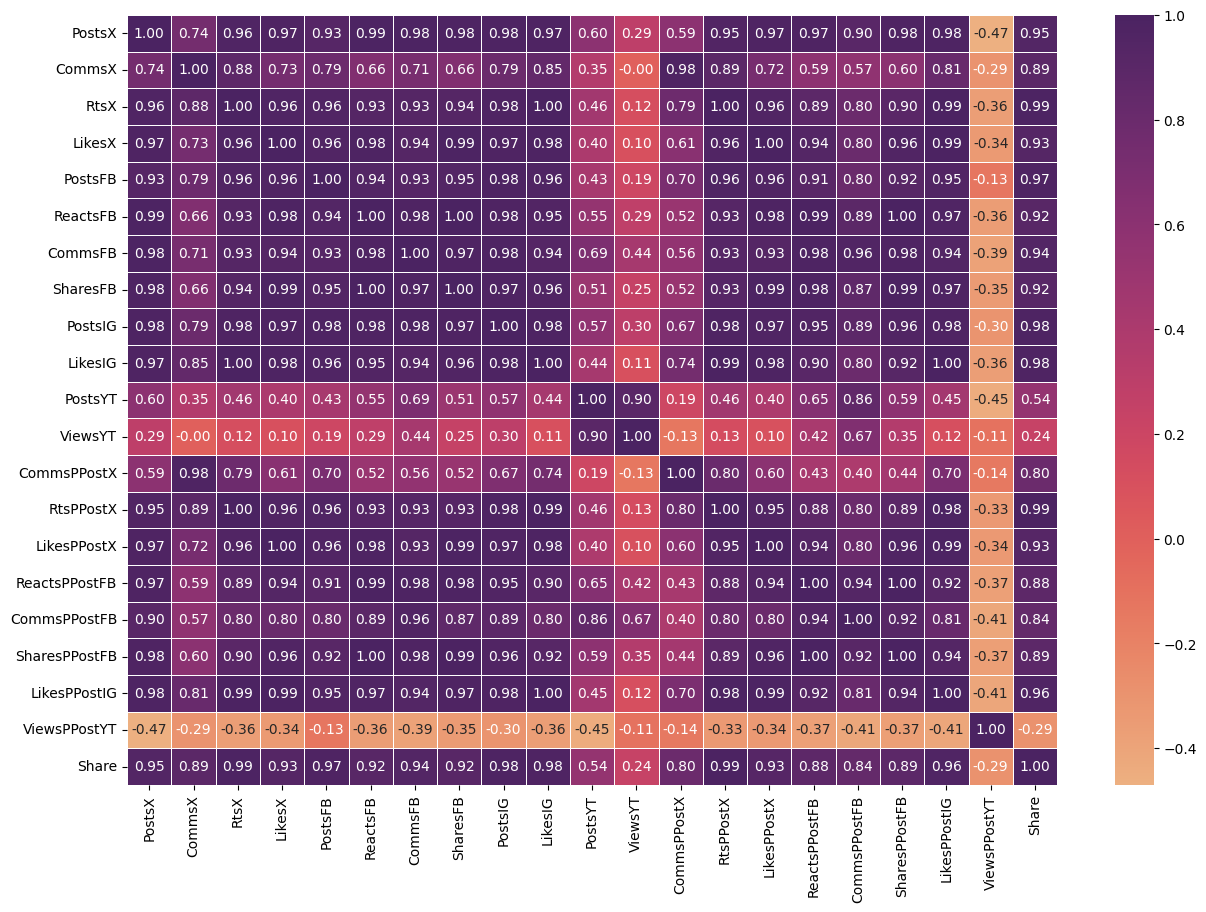

In [28]:
# Let's make it look a little prettier
corr_matrix = corr_df_am.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="flare");

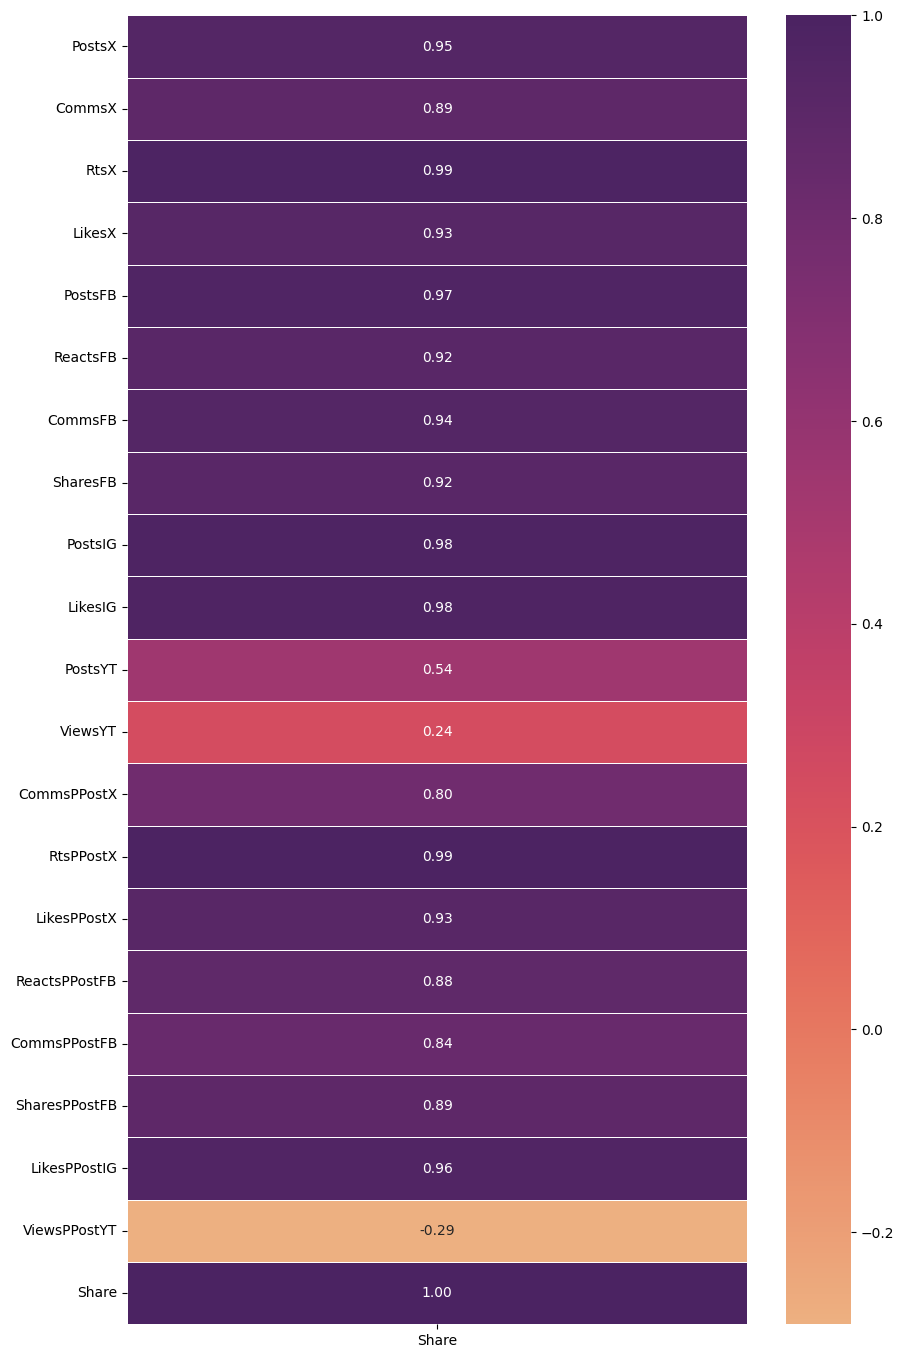

In [29]:
# Let's make it look a little prettier
corr_matrix = corr_df_am.corr()
x = corr_matrix[['Share']]
plt.figure(figsize=(10, 17))
sns.heatmap(x, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="flare");

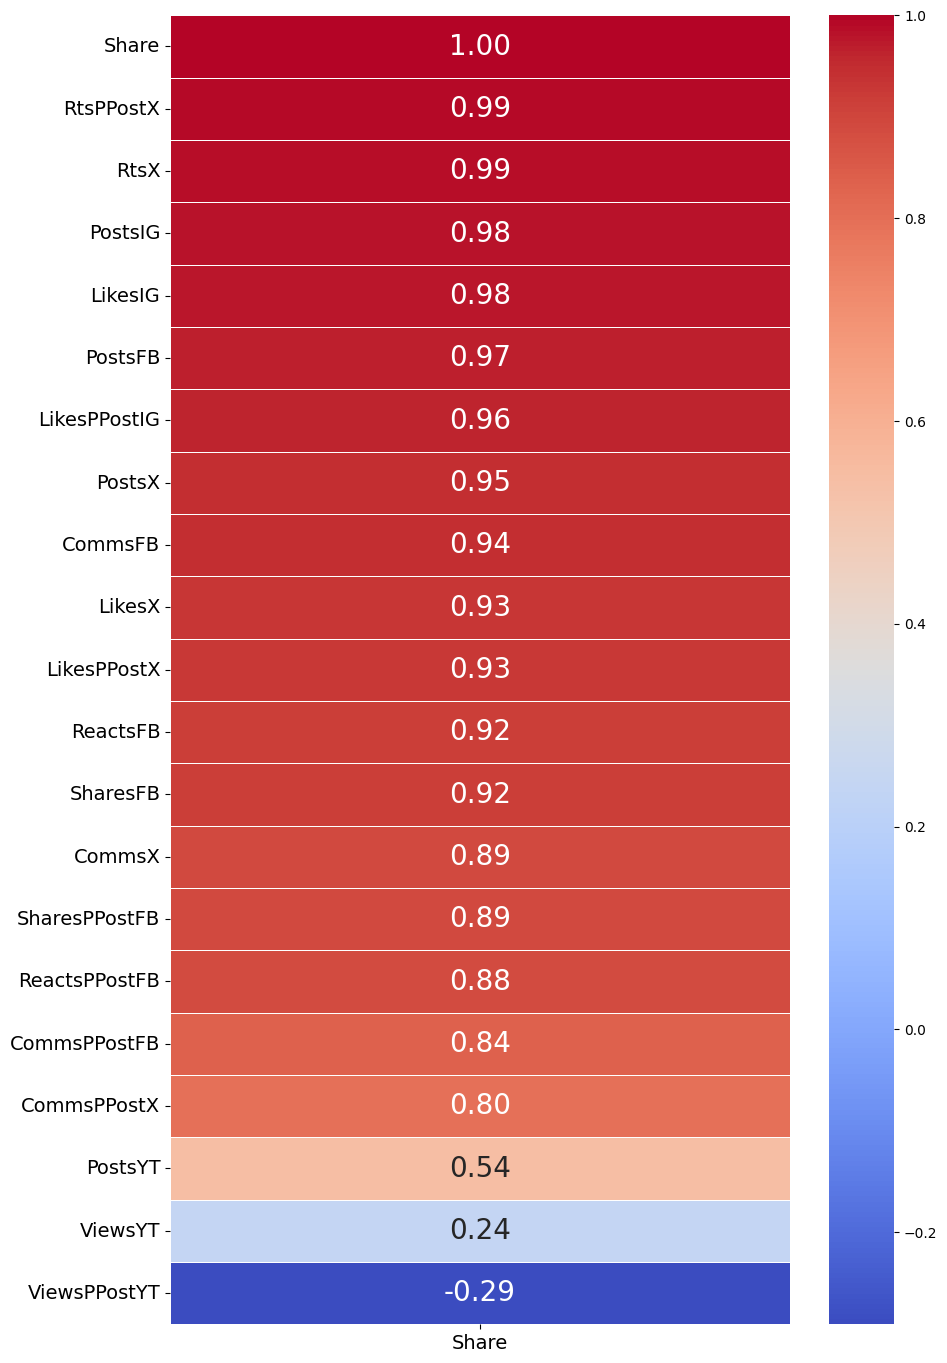

In [30]:
x = x.sort_values(['Share'], ascending=False)
plt.figure(figsize=(10, 17))
sns.heatmap(x, 
            annot=True, 
            annot_kws={"size": 20},
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="coolwarm");

            # Adjust the size of the feature labels (ticks)
plt.xticks(fontsize=14)  # Set font size for x-axis labels (columns)
plt.yticks(fontsize=14)

plt.show()